# Doublespike Correction

Isopy contain the function ``ds_inversion`` that will perform the double spike inversion

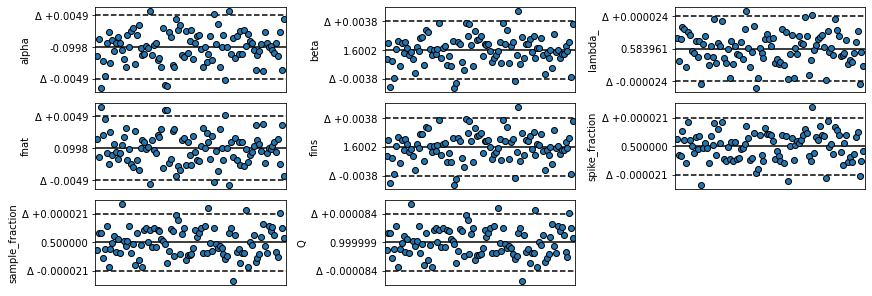

In [14]:
import isopy
import numpy as np
import matplotlib.pyplot as plt

spike = isopy.array([0, 1, 1, 0], ['104pd', '106pd', '108pd', '110pd'])
sample = isopy.tb.make_ms_sample('pd', spike_mixture=spike, fnat = 0.1, fins=1.6)
result = isopy.tb.ds_inversion(sample, spike) #Performes the inversion individually on each measurement

isopy.tb.plot_hstack(plt, result, figure_width=12, compare=True, subplots_grid=(-1, 3))

In [13]:
np.mean(result) #we can use array functions on the result object

DSResult(method = "rudge",
alpha = -0.09943587413021808,
beta = 1.6003352613149833,
lambda_ = 0.5839573008179902,
fnat = 0.09943587413021808,
fins = 1.6003352613149833,
spike_fraction = 0.4999975709027726,
sample_fraction = 0.5000024290972275,
Q = 1.0000097173838214)

In [18]:
isopy.sd2(result)

DSResult(method = "rudge",
alpha = 0.004856277112868258,
beta = 0.0038396307946891514,
lambda_ = 2.4018356461377494e-05,
fnat = 0.004856277112868258,
fins = 0.0038396307946891514,
spike_fraction = 2.0972609881297664e-05,
sample_fraction = 2.0972609881305304e-05,
Q = 8.389071520438619e-05)

The function ``ds_Delta`` will calculate the fractionated value of a mass ratio from a natural fractionation factor

In [19]:
isopy.tb.ds_Delta('pd108/pd105', result, normalisation_factor=1000) #It will automatically get *fnat* from a DSResult object.

array([2.85672956, 2.77997656, 2.99401283, 2.87566445, 2.94309674,
       2.79772073, 2.75108823, 2.88639475, 2.78818344, 2.83483765,
       2.80031759, 2.77184519, 2.79853893, 2.83003803, 2.86726161,
       2.90445037, 2.76485293, 2.81462782, 2.74861268, 2.73501623,
       2.88989447, 2.76570308, 2.72246455, 2.82023193, 2.8521296 ,
       2.84519715, 2.81256519, 2.82253171, 2.66137021, 2.85290129,
       2.80909744, 2.79752435, 2.87274784, 2.86463748, 2.90119153,
       2.73301775, 2.98070671, 2.98408473, 2.75191663, 2.77150128,
       2.89268647, 2.90188947, 2.6972127 , 2.74236097, 2.72300655,
       2.85123569, 2.86087261, 2.74627485, 2.84300559, 2.78893254,
       2.7437753 , 2.86977005, 2.79962116, 2.76734412, 2.76431731,
       2.82711304, 2.90449715, 2.81769016, 2.88136081, 2.84627594,
       2.7696066 , 2.87157192, 2.67330693, 2.80482941, 2.71803717,
       2.90103507, 2.81809601, 2.76597342, 2.95984533, 2.81822072,
       2.65985548, 2.84527433, 2.77881258, 2.86376565, 2.76822

## Doublespike Interference correction
Isopy also contains the function ``ds_correction`` that will apply an iterative correction for isobaric interferences.
You can have a look at the [source code](https://isopy.readthedocs.io/en/latest/_modules/isopy/toolbox/doublespike.html#ds_correction) to see how this is implemented.

In [21]:
sample2 = isopy.tb.make_ms_sample('pd', spike_mixture=spike, fnat = 0.1, fins=1.6, ru101=0.1)

result = isopy.tb.ds_correction(sample2, spike) 
np.mean(result)

DSResult(method = "rudge",
alpha = -0.09992939948251951,
beta = 1.6000761527808425,
lambda_ = 0.583959746913014,
fnat = 0.09992939948251951,
fins = 1.6000761527808425,
spike_fraction = 0.49999892944896523,
sample_fraction = 0.5000010705510347,
Q = 1.0000042834559506)

For reference this is the result without the interference correction

In [22]:
result = isopy.tb.ds_inversion(sample2, spike) 
np.mean(result)

DSResult(method = "rudge",
alpha = 5.2856363495779535,
beta = 4.066390531075727,
lambda_ = 0.5363840543173414,
fnat = -5.2856363495779535,
fins = 4.066390531075727,
spike_fraction = 0.4633194696665244,
sample_fraction = 0.5366805303334756,
Q = 1.1583379634931965)

## Comparing Rudge and Siebert methods

All double spike functions allow you to specify the method used for the inversion. 
Your choices are ``"rudge"`` ([Rudge et al. 2009](https://doi.org/10.1016/j.chemgeo.2009.05.010)) and ``"siebert"`` ([Siebert et al. 2001](https://doi.org/10.1029/2000GC000124)). 

As you can see from the examples below there is virtually no difference in the result between the different methods. The ``"siebert"`` method is faster however it will occasionally fail at extreme spike/sample fractions (See Finding the Optimal Doublespike). The default method of both ``ds_inversion`` and ``ds_correction`` is ``"rudge"``.

In [15]:
sample = isopy.tb.make_ms_sample('pd', spike_mixture=spike, fnat = 0.1, fins=1.6)

In [16]:
%timeit result = isopy.tb.ds_inversion(sample, spike, method='rudge') #Default method
np.mean(isopy.tb.ds_inversion(sample, spike, method='rudge'))

36.9 ms ± 265 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


DSResult(method = "rudge",
alpha = -0.1001773945957361,
beta = 1.5998790633865965,
lambda_ = 0.5839596465071536,
fnat = 0.1001773945957361,
fins = 1.5998790633865965,
spike_fraction = 0.4999982439108319,
sample_fraction = 0.5000017560891681,
Q = 1.0000070253111268)

In [17]:
%timeit result = isopy.tb.ds_inversion(sample, spike, method='siebert')
np.mean(isopy.tb.ds_inversion(sample, spike, method='siebert'))

2.2 ms ± 119 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


DSResult(method = "siebert",
alpha = -0.10017739517507622,
beta = 1.5998790634076019,
lambda_ = 0.583959646502394,
fnat = 0.10017739517507622,
fins = 1.5998790634076019,
spike_fraction = 0.49999824390685504,
sample_fraction = 0.500001756093145,
Q = 1.0000070253270348)

# Example workflow
Below is a short example of a 

In [1]:
import isopy
import numpy as np
import matplotlib.pyplot as plt

This function will return the mean compostion of our blank after outlier rejection

In [12]:
def process_blank(blank):
    pass

In [13]:
def process_sample(sample):
    pass

In [2]:
array1 = isopy.array([[1,2,3], [4,5,6]], ('pd105', 'pd106', 'pd108'))
array2 = isopy.array([0.5, 1, 1.5], ('pd105', 'pd106', 'pd108'))
array1 * array2

(row) , 105Pd   , 106Pd   , 108Pd   
0     , 0.50000 , 2.00000 , 4.50000 
1     , 2.00000 , 5.00000 , 9.00000 

#### Define the our spike

In [3]:
spike = isopy.zeros(None, ('104pd', '106pd', '108pd', '110pd'))
spike['106pd'] = 1
spike['110pd'] = 1
spike

(row) , 104Pd   , 106Pd   , 108Pd   , 110Pd   
None  , 0.00000 , 1.00000 , 0.00000 , 1.00000 

#### Synthesise some analyses

In [23]:
blank = isopy.tb.make_ms_sample('pd', maxv=0.1, fins=1.6, ru101=0.0001)

bracket1 = isopy.tb.make_ms_sample('pd', spike_mixture = spike, maxv=10, fnat=-0.09, fins=1.6, ru101=0.0001)

sample = isopy.tb.make_ms_sample('pd', spike_mixture = spike, maxv=10, fins=1.6, fnat=0.1, ru101=0.01)

bracket2 = isopy.tb.make_ms_sample('pd', spike_mixture = spike, maxv=10, fnat=-0.11, fins=1.6, ru101=0.0001)

#### Calculate the average blank value

In [ ]:
def process_blank(blank):
    blank_r = blank.ratio() #This will create a ratio against column with the largest value
    blank_outliers = isopy.tb.find_outliers(blank, axis=1)
    blank_accepted = np.invert(blank_outliers)
    blank_avg = np.mean(blank[blank_accepted])

    figure = isopy.tb.update_figure(plt, figheight=6, figwidth=8)
    isopy.tb.plot_hstack(plt, blank, outliers=blank_outliers, color=isopy.tb.ColorPairs[0])
    isopy.tb.plot_hcompare(figure)

c:\users\matti\dropbox\python\isopy\isopy\toolbox\plotting.py:1245: RuntimeWarning: All-NaN axis encountered
  wstart = np.nanmax([wstart, _axes_data_func(ax, waxis, np.nanmax, default_value=np.nan)])


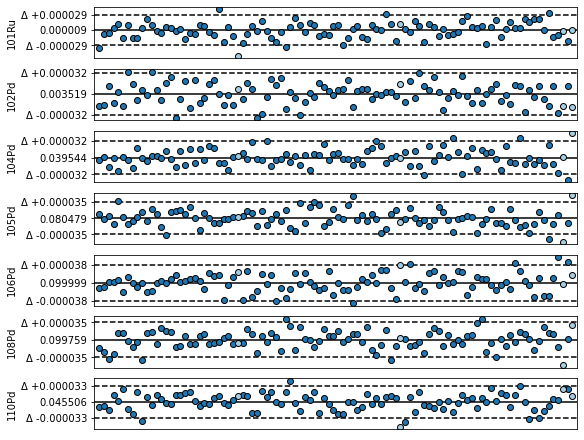

In [5]:
blank_r = blank.ratio()
blank_outliers = isopy.tb.find_outliers(blank, axis=1)
blank_accepted = np.invert(blank_outliers)
blank_avg = np.mean(blank[blank_accepted])

figure = isopy.tb.update_figure(plt, figheight=6, figwidth=8)
isopy.tb.plot_hstack(plt, blank, outliers=blank_outliers, color=isopy.tb.ColorPairs[0])
isopy.tb.plot_hcompare(figure)

#### Calculate *fnat* for the bracketing standards

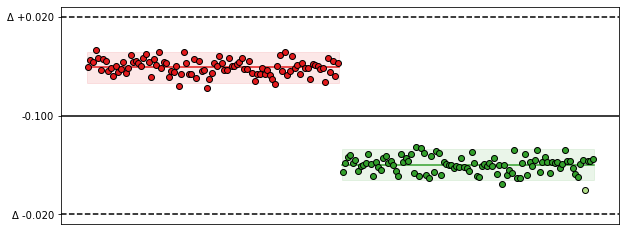

In [6]:
bracket1_result = isopy.tb.ds_correction(bracket1, spike)
bracket1_fnat = bracket1_result.fnat

bracket1_outliers = isopy.tb.find_outliers(bracket1_fnat)
bracket1_accepted = np.invert(bracket1_outliers)
bracket1_fnat_avg = np.mean(bracket1_fnat[bracket1_accepted])

bracket2_result = isopy.tb.ds_correction(bracket2, spike)
bracket2_fnat = bracket2_result.fnat

bracket2_outliers = isopy.tb.find_outliers(bracket2_fnat)
bracket2_accepted = np.invert(bracket2_outliers)
bracket2_fnat_avg = np.mean(bracket2_fnat[bracket2_accepted])

isopy.tb.update_figure(plt, figwidth=10)
isopy.tb.plot_hstack(plt, bracket1_fnat, outliers=bracket1_outliers, cval=True, pmval=True, color=isopy.tb.ColorPairs[1])
isopy.tb.plot_hstack(plt, bracket2_fnat, outliers=bracket2_outliers, cval=True, pmval=True, color=isopy.tb.ColorPairs[2])
isopy.tb.plot_hcompare(plt)

#### Calculate the bracketing *fnat* mean


In [7]:
bracket_fnat_avg = np.mean([bracket1_fnat_avg, bracket2_fnat_avg])
bracket_fnat_avg

-0.09987735182012025

#### Calculate our sample

Wall time: 218 ms


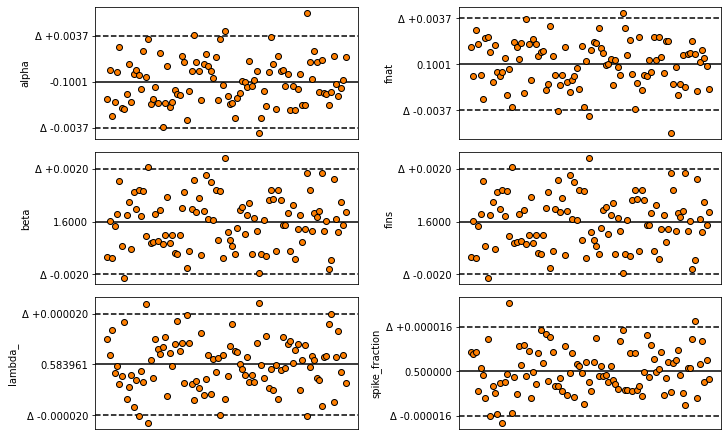

In [10]:
sample_blk = sample #- blank_avg
%time sample_result = isopy.tb.ds_correction(sample_blk, spike, method='rudge')
#sample_result = isopy.tb.ds_inversion(sample, spike)
sample_outliers = isopy.tb.find_outliers(sample_result.fnat)


layout = list(zip(sample_result.keys()[:3], sample_result.keys()[3:]))
axes = isopy.tb.create_subplots(plt, layout, figwidth=10, figheight=6)
for attr in axes:
    ax = axes[attr]
    isopy.tb.plot_hstack(ax, getattr(sample_result, attr), outliers=sample_outliers, color=isopy.tb.ColorPairs[3])
    isopy.tb.plot_hcompare(ax)
    ax.set_ylabel(attr)

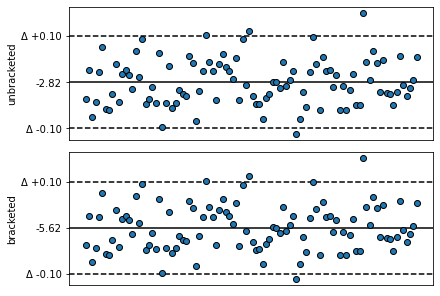

In [11]:
axes = isopy.tb.create_subplots(plt, [['top'], ['bottom']])

sample_delta = isopy.tb.ds_Delta('pd105/pd108', sample_result, 0, 1000)
isopy.tb.plot_hstack(axes['top'], sample_delta, outliers=sample_outliers, color=isopy.tb.ColorPairs[6])
axes['top'].set_ylabel('unbracketed')

sample_delta = isopy.tb.ds_Delta('pd105/pd108', sample_result, bracket_fnat_avg, 1000)
isopy.tb.plot_hstack(axes['bottom'], sample_delta, outliers=sample_outliers, color=isopy.tb.ColorPairs[6])
axes['bottom'].set_ylabel('bracketed')
isopy.tb.plot_hcompare(axes)